In [15]:
import pandas as pd
import numpy as np

## Examining the Data

In [2]:
# read the data
users_data = pd.read_pickle("../data/users_data_final.pkl")


In [3]:
# preview the data

users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [4]:
# check the shape of the data

users_data.shape

(45209, 19)

In [5]:
# check the structure of the data

users_data.info()

# remind yourself how many 

<class 'pandas.core.frame.DataFrame'>
Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-null 

### 1. Feature Selection

In [8]:
# drop features we have considered redundant 
# dropping user_id and date_joined

users_data_cleaned = users_data.drop(['user_id', 'date_joined'], axis = 1)

list(users_data_cleaned) # this gives the columns of the data frame

['number_transactions',
 'total_amount_usd',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'term_deposit',
 'device']

In [10]:
# Identify correlated features

users_data_cleaned.corr(numeric_only = True)

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


In [16]:
def identify_highly_correlated_features(df, correlation_threshold):
    """
    This definition can be used to identify highly correlated features
    
    @param df pandas DataFrame
    @param correlation_threshold int 
    
    @return a DataFrame with highly correlated features 
    """
    
    corr_matrix = df.corr(numeric_only = True).abs() # calculate the correlation matrix with 
    high_corr_var = np.where(corr_matrix >= correlation_threshold) # identify variables that have correlations above defined threshold
    high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables
    
    high_corr_var_df = pd.DataFrame(high_corr_var).rename(columns = {0: 'corr_feature',
                                                                     1: 'drop_feature',
                                                                     2: 'correlation_values'})

    
    if high_corr_var_df.empty:
        high_corr_var_df
    else:
        high_corr_var_df = high_corr_var_df.sort_values(by = 'correlation_values', ascending = False)

    return high_corr_var_df


In [24]:
identify_highly_correlated_features(users_data_cleaned, correlation_threshold=0.85)

# we have no highly correlated features

""


In [25]:
users_data_cleaned.describe()

# we have no variables with a std < 0.5 so we don't have to drop any features because of low variance

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


### 2. Handling Missing Data

In [26]:
users_data_cleaned.isnull().sum()

number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
device                    94
dtype: int64

In [27]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df[missing_value_df.percent_missing > 0]

In [29]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,number_transactions,22.12,float64
3,total_amount_usd,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object


In [30]:
users_data_cleaned[users_data_cleaned.poutcome.isnull()]

,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,device
0,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,mobile
1,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,desktop
2,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,mobile
3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,tablet
4,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,2.0,113.0,23,student,single,tertiary,False,False,False,cellular,266,1,-1,0,None,True,desktop
45210,3.0,505.0,25,technician,single,secondary,False,False,True,cellular,386,2,-1,0,None,True,tablet
45211,2.0,825.0,51,technician,married,tertiary,False,False,False,cellular,977,3,-1,0,None,True,desktop
45212,4.0,1729.0,71,retired,divorced,primary,False,False,False,cellular,456,2,-1,0,None,True,desktop


In [31]:
# drop features that have more than 80% missing data

users_data_cleaned.drop(['poutcome'], axis = 1, inplace = True)


In [32]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,feature,percent_missing,data_type
0,contact,28.80,object
1,number_transactions,22.12,float64
2,total_amount_usd,22.12,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object


In [33]:
# identify all variables with data type object and replace NAs with Unknown

users_data_cleaned.contact.fillna("Unknown", inplace = True)

In [34]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object


In [35]:
users_data_cleaned.education.fillna("Unknown", inplace = True)
users_data_cleaned.job.fillna("Unknown", inplace = True)
users_data_cleaned.device.fillna("Unknown", inplace = True)

In [39]:
users_data.device.value_counts(dropna = False)

device
mobile     27504
desktop    12112
tablet      5499
None          94
Name: count, dtype: int64

In [37]:
users_data_cleaned.device.value_counts()

device
mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: count, dtype: int64

In [36]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64


In [40]:
# replace variables with numerical data types with missing data with 0

users_data_cleaned.number_transactions.fillna(0, inplace = True)
users_data_cleaned.total_amount_usd.fillna(0, inplace = True)


In [41]:
missing_df = identify_missing_data(users_data_cleaned)
missing_df

,feature,percent_missing,data_type


## Encoding features

In [42]:
users_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45209 entries, 0 to 45215
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45209 non-null  float64
 1   total_amount_usd     45209 non-null  float64
 2   age                  45209 non-null  int64  
 3   job                  45209 non-null  object 
 4   marital              45209 non-null  object 
 5   education            45209 non-null  object 
 6   default              45209 non-null  bool   
 7   housing              45209 non-null  bool   
 8   loan                 45209 non-null  bool   
 9   contact              45209 non-null  object 
 10  duration             45209 non-null  int64  
 11  campaign             45209 non-null  int64  
 12  pdays                45209 non-null  int64  
 13  previous             45209 non-null  int64  
 14  term_deposit         45209 non-null  bool   
 15  device               45209 non-null  obje

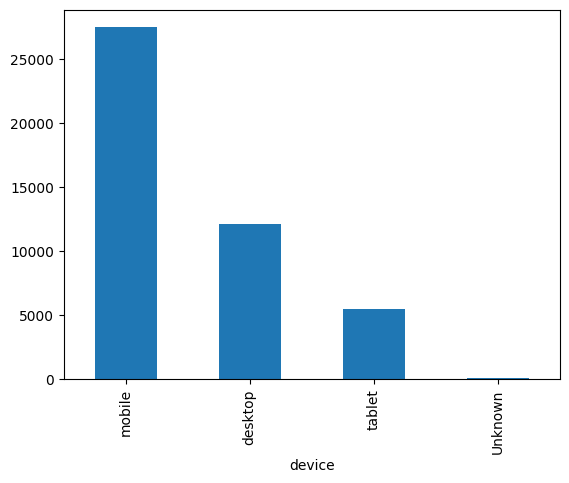

In [46]:
users_data_cleaned.device.value_counts().plot(kind = 'bar');

In [49]:
dummies = pd.get_dummies(users_data_cleaned.device, prefix = 'device')
pd.concat([users_data_cleaned.device, dummies], axis=1)

,device,device_Unknown,device_desktop,device_mobile,device_tablet
0,mobile,False,False,True,False
1,desktop,False,True,False,False
2,mobile,False,False,True,False
3,tablet,False,False,False,True
4,mobile,False,False,True,False
...,...,...,...,...,...
45211,desktop,False,True,False,False
45212,desktop,False,True,False,False
45213,mobile,False,False,True,False
45214,desktop,False,True,False,False


In [50]:
def one_hot(df, categorical_cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df

In [51]:
categorical_cols = ['device', 'marital']

one_hot(users_data_cleaned, categorical_cols)

,number_transactions,total_amount_usd,age,job,education,default,housing,loan,contact,duration,...,pdays,previous,term_deposit,device_Unknown,device_desktop,device_mobile,device_tablet,marital_divorced,marital_married,marital_single
0,3.0,2143.0,58,management,tertiary,False,True,False,Unknown,261,...,-1,0,False,False,False,True,False,False,True,False
1,0.0,0.0,44,technician,secondary,False,True,False,Unknown,151,...,-1,0,False,False,True,False,False,False,False,True
2,2.0,2.0,33,entrepreneur,secondary,False,True,True,Unknown,76,...,-1,0,False,False,False,True,False,False,True,False
3,0.0,0.0,47,blue-collar,Unknown,False,True,False,Unknown,92,...,-1,0,False,False,False,False,True,False,True,False
4,1.0,1.0,33,Unknown,Unknown,False,False,False,Unknown,198,...,-1,0,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.0,51,technician,tertiary,False,False,False,cellular,977,...,-1,0,True,False,True,False,False,False,True,False
45212,4.0,1729.0,71,retired,primary,False,False,False,cellular,456,...,-1,0,True,False,True,False,False,True,False,False
45213,2.0,5715.0,72,retired,secondary,False,False,False,cellular,1127,...,184,3,True,False,False,True,False,False,True,False
45214,0.0,0.0,57,blue-collar,secondary,False,False,False,telephone,508,...,-1,0,False,False,True,False,False,False,True,False


In [52]:
# code to identify all variables with data type object
# double check number of categories

categories = (users_data_cleaned.select_dtypes("object")
            .apply(pd.Series.nunique)
            .sort_values(ascending=False))
        
categories

# you might want to drop variables that have more than 15-20 categories

job          12
education     4
device        4
marital       3
contact       3
dtype: int64

In [56]:
# identifying variables that need encoding after double checking they dont have an insane number of categories

categorical_cols = list(users_data_cleaned.select_dtypes(['object']).columns)
print("Number of variables that need encoding", len(categorical_cols))

Number of variables that need encoding 5


In [59]:
users_data_w_encoding = one_hot(users_data_cleaned, categorical_cols)
users_data_w_encoding.head()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,False,True,False,261,1,-1,0,...,False,False,True,True,False,False,False,False,True,False
1,0.0,0.0,44,False,True,False,151,1,-1,0,...,False,True,False,True,False,False,False,True,False,False
2,2.0,2.0,33,False,True,True,76,1,-1,0,...,False,True,False,True,False,False,False,False,True,False
3,0.0,0.0,47,False,True,False,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,1.0,1.0,33,False,False,False,198,1,-1,0,...,False,False,False,True,False,False,False,False,True,False


In [60]:
print("shape of data before encoding:", users_data_cleaned.shape)
print("shape of data after encoding:", users_data_w_encoding.shape)


shape of data before encoding: (45209, 16)
shape of data after encoding: (45209, 37)


In [61]:
users_data_w_encoding.info()

# you should have no missing data and all your non numerical variables should be encoded

<class 'pandas.core.frame.DataFrame'>
Index: 45209 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45209 non-null  float64
 1   total_amount_usd     45209 non-null  float64
 2   age                  45209 non-null  int64  
 3   default              45209 non-null  bool   
 4   housing              45209 non-null  bool   
 5   loan                 45209 non-null  bool   
 6   duration             45209 non-null  int64  
 7   campaign             45209 non-null  int64  
 8   pdays                45209 non-null  int64  
 9   previous             45209 non-null  int64  
 10  term_deposit         45209 non-null  bool   
 11  job_Unknown          45209 non-null  bool   
 12  job_admin.           45209 non-null  bool   
 13  job_blue-collar      45209 non-null  bool   
 14  job_entrepreneur     45209 non-null  bool   
 15  job_housemaid        45209 non-null  bool

### Building the ML Model - we will pick this up next week

In [62]:
# define our feature and target
target = users_data_w_encoding.total_amount_usd
features = users_data_w_encoding.drop(['total_amount_usd'], axis = 1)

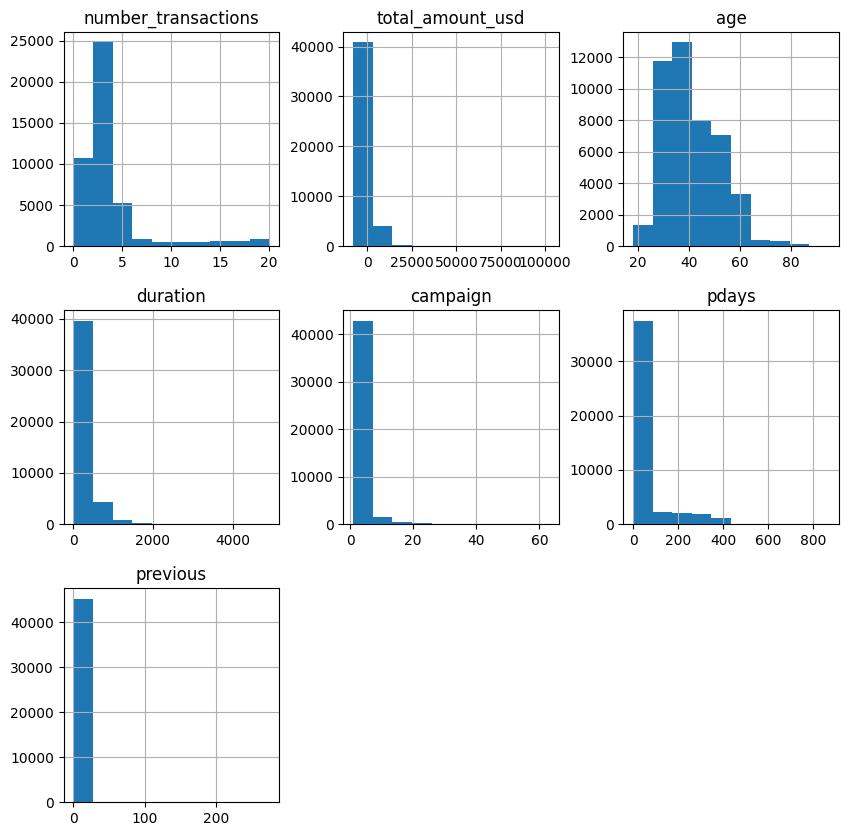

In [64]:
users_data_w_encoding.hist(figsize=(10, 10));

In [65]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

features_scaled

array([[0.15      , 0.51948052, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33766234, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1       , 0.19480519, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.1       , 0.7012987 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.50649351, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15      , 0.24675325, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [67]:
# print the shape of the training data

print("Training Data")
print(X_train.shape)
print(y_train.shape)

Training Data
(36167, 36)
(36167,)


In [68]:
# print the shape of the test data

print("Test Data")
print(X_test.shape)
print(y_test.shape)

Test Data
(9042, 36)
(9042,)


In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [70]:
# training the model

lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(X_test)
y_pred

array([1620.3125 , 1291.78125, 1350.53125, ...,  841.53125, 1145.59375,
       1360.75   ])

In [73]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.02424606940198759